In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [2]:
import glob
path ='data/' 
filenames = glob.glob(path + "*.txt")

df_list = []
for filename in filenames: # remove counter to load all locally available data.
    counter = 0
    while counter < 1:
        df_list.append(pd.read_csv(filename))
        counter += 1

# concatenating the DFs together as 'df'
df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184282 entries, 0 to 196987
Data columns (total 11 columns):
C/A                                                                     1184282 non-null object
UNIT                                                                    1184282 non-null object
SCP                                                                     1184282 non-null object
STATION                                                                 1184282 non-null object
LINENAME                                                                1184282 non-null object
DIVISION                                                                1184282 non-null object
DATE                                                                    1184282 non-null object
TIME                                                                    1184282 non-null object
DESC                                                                    1184282 non-null object
ENTRIES                 

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [5]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,03:00:00,RECOVR AUD,6527780,2210496,A002_R051_02-00-00_59 ST,2018-02-24
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,07:00:00,REGULAR,6527794,2210507,A002_R051_02-00-00_59 ST,2018-02-24
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,11:00:00,REGULAR,6527838,2210585,A002_R051_02-00-00_59 ST,2018-02-24
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,15:00:00,REGULAR,6527994,2210644,A002_R051_02-00-00_59 ST,2018-02-24
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,19:00:00,REGULAR,6528278,2210705,A002_R051_02-00-00_59 ST,2018-02-24


In [7]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME']

In [8]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y %H:%M:%S")

In [9]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
178858,R523,R147,00-00-01,61 ST WOODSIDE,7,IRT,04/03/2018,09:00:00,REGULAR,2270813,3463364,R523_R147_00-00-01_61 ST WOODSIDE,2018-04-03,2018-04-03 09:00:00
57873,N094,R029,01-03-05,WORLD TRADE CTR,ACE23,IND,02/24/2018,23:00:00,REGULAR,63137,11698,N094_R029_01-03-05_WORLD TRADE CTR,2018-02-24,2018-02-24 23:00:00
49989,N063A,R011,00-00-00,42 ST-PORT AUTH,ACENQRS1237W,IND,03/18/2018,00:00:00,REGULAR,475107,1889188,N063A_R011_00-00-00_42 ST-PORT AUTH,2018-03-18,2018-03-18 00:00:00
5600,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,03/14/2018,00:00:00,REGULAR,3096238,2582211,A038_R085_00-00-00_8 ST-NYU,2018-03-14,2018-03-14 00:00:00
14085,B013,R196,01-00-02,PROSPECT PARK,BQS,BMT,02/26/2018,15:00:00,REGULAR,13889539,7900646,B013_R196_01-00-02_PROSPECT PARK,2018-02-26,2018-02-26 15:00:00
164071,R290,R161,00-00-03,KINGSBRIDGE RD,4,IRT,02/25/2018,20:00:00,REGULAR,2281637,816251,R290_R161_00-00-03_KINGSBRIDGE RD,2018-02-25,2018-02-25 20:00:00
194109,R645,R110,00-03-02,FLATBUSH AV-B.C,25,IRT,03/23/2018,05:00:00,REGULAR,12689901,6502439,R645_R110_00-03-02_FLATBUSH AV-B.C,2018-03-23,2018-03-23 05:00:00
129247,R135,R031,01-00-03,34 ST-PENN STA,123,IRT,03/24/2018,20:00:00,REGULAR,2675510,6351298,R135_R031_01-00-03_34 ST-PENN STA,2018-03-24,2018-03-24 20:00:00
18307,B028,R136,01-00-01,SHEEPSHEAD BAY,BQ,BMT,03/18/2018,13:00:00,REGULAR,702658,255359,B028_R136_01-00-01_SHEEPSHEAD BAY,2018-03-18,2018-03-18 13:00:00
55577,N090,R139,01-00-01,CANAL ST,ACE,IND,03/19/2018,12:00:00,REGULAR,2811487,5388399,N090_R139_01-00-01_CANAL ST,2018-03-19,2018-03-19 12:00:00


In [10]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION']]

In [11]:
df_temp.sample(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
165728,R314_R406_00-00-00_PROSPECT AV,2018-04-02,2018-04-02 17:00:00,11677159,1390308,PROSPECT AV
138592,R174_R034_00-00-01_125 ST,2018-03-27,2018-03-27 00:00:00,4457787,5332663,125 ST
177813,R508_R346_00-00-01_COURT SQ,2018-03-09,2018-03-09 03:00:00,450694,345454,COURT SQ
81794,N330_R202_00-03-01_63 DR-REGO PARK,2018-03-26,2018-03-26 16:00:00,3456320,2030527,63 DR-REGO PARK
148756,R227A_R131_01-00-01_23 ST,2018-03-29,2018-03-29 01:00:00,4613405,1827030,23 ST
2351,A015_R081_00-03-00_49 ST,2018-03-22,2018-03-22 16:00:00,6716501,8685436,49 ST
82143,N330C_R202_01-06-02_63 DR-REGO PARK,2018-04-04,2018-04-04 16:00:00,4446144,268190,63 DR-REGO PARK
38088,J021_R434_00-00-02_VAN SICLEN AV,2018-03-17,2018-03-17 05:00:00,6583450,5528913,VAN SICLEN AV
9631,A053_R088_03-00-01_CORTLANDT ST,2018-04-01,2018-04-01 13:00:00,21106,26695,CORTLANDT ST
145938,R210_R044_00-05-01_BROOKLYN BRIDGE,2018-03-27,2018-03-27 08:00:00,0,2241,BROOKLYN BRIDGE


In [12]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

In [13]:
df_temp1.head()

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,14.0,11.0
2,04:00:00,44.0,78.0
3,04:00:00,156.0,59.0
4,04:00:00,284.0,61.0


In [14]:
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [15]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION
0,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 03:00:00,6527780,2210496,59 ST
1,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 07:00:00,6527794,2210507,59 ST
2,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 11:00:00,6527838,2210585,59 ST
3,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 15:00:00,6527994,2210644,59 ST
4,A002_R051_02-00-00_59 ST,2018-02-24,2018-02-24 19:00:00,6528278,2210705,59 ST


In [16]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [17]:
df_temp1['STATION']=df_temp2['STATION']

In [18]:
df_temp1['date']=df_temp2['date']

In [19]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
0,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
1,04:00:00,14.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
2,04:00:00,44.0,78.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
3,04:00:00,156.0,59.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
4,04:00:00,284.0,61.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
5,04:00:00,111.0,23.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
6,NaT,NaN,NaN,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
7,04:00:00,6.0,7.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
8,04:00:00,45.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25
9,04:00:00,123.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-25


In [20]:
df_temp1.dropna(axis=0,inplace=True)

In [21]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES','turnstile_id','STATION','date']]

In [22]:
df_final.head()

,ENTRIES,turnstile_id,STATION,date
1,14.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
2,44.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
3,156.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
4,284.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24
5,111.0,A002_R051_02-00-00_59 ST,59 ST,2018-02-24


In [23]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [24]:
df_final1['ENTRIES'].max()

838736200.0

In [25]:
df_anal=df_final1.reset_index()

In [26]:
type(df_final1)

pandas.core.frame.DataFrame

In [27]:
df_final1.columns

Index(['ENTRIES'], dtype='object')

In [28]:
df_anal.head()

,turnstile_id,date,STATION,ENTRIES
0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0
1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0
2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0
3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0
4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0


In [29]:
station_entry_count = df_anal.groupby(by='STATION', as_index=False).sum()[['STATION','ENTRIES']].sort_values('ENTRIES', ascending=False)

In [30]:
top_20_station_entry_count=station_entry_count.head(30)

In [31]:
top_20_station_entry_count=top_20_station_entry_count.drop(top_20_station_entry_count[top_20_station_entry_count['ENTRIES']> 83880054].index)

In [32]:
top_20_unique_station=top_20_station_entry_count['STATION'].unique()

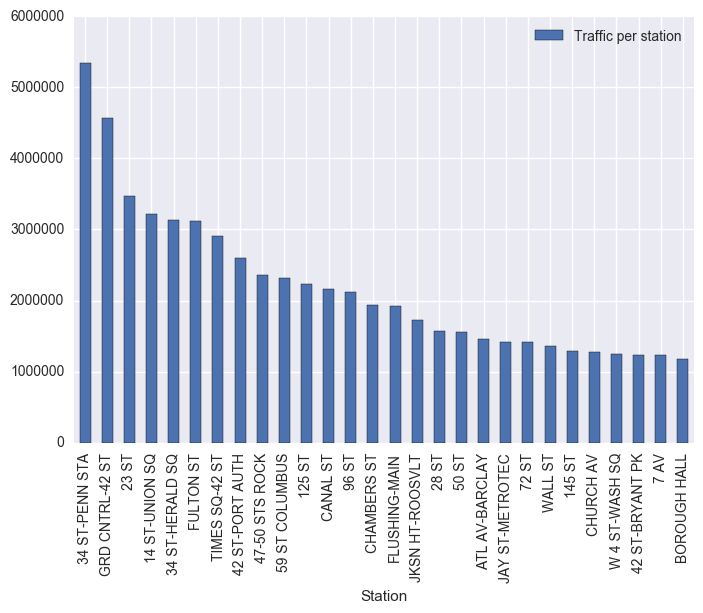

In [33]:
top_20_station_entry_count.plot(kind='bar', x='STATION', y='ENTRIES',label='Traffic per station')
plt.xlabel('Station')

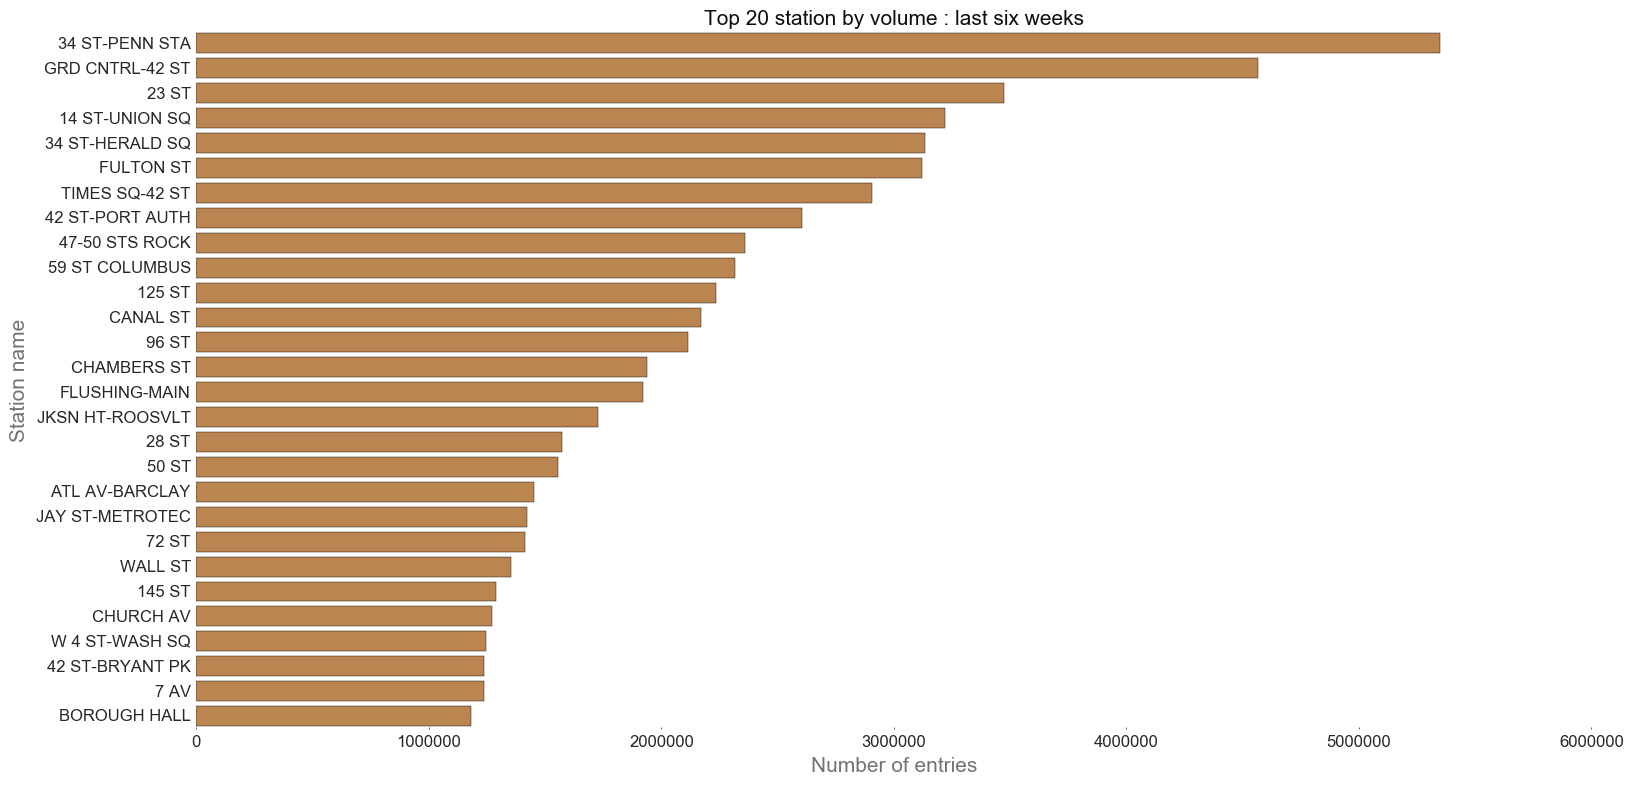

In [39]:
import matplotlib as mpl
mpl.rc('font', family='serif', serif='Times New Roman')
sns.reset_orig()
sns.set_style("white",
              {'xtick.major.size': 1.5,
               'ytick.major.size': 0.0,
               'xtick.direction': u'in',
               'axes.linewidth': 0.5,
               'axes.edgecolor': '.2',
               'grid.linestyle': u'-',
               'axes.labelcolor': '.05',
               'ytick.major.size': 0.0,
               'ytick.minor.size': 0.0,
               'ytick.direction': u'out',
               'axes.labelcolor': '.45',
               'text.color': '.05',
               'ytick.color': '.15',
               'grid.color': '.05'})
#sns.set_context("talk")

f, ax = plt.subplots(figsize=(18, 9))
sns.set(style="whitegrid")
sns.set(font_scale=1)
ax=sns.barplot(y="STATION", x="ENTRIES", data=top_20_station_entry_count,
            label="Total",color='peru');
sns.despine(left=True, bottom=True,trim=True)
ax.set_title('Top 20 station by volume : last six weeks',fontsize=15)
ax.set_xlabel('Number of entries',fontsize=15)
ax.set_ylabel('Station name',fontsize=15)
plt.savefig('MTN_many_file'+'.'+'png',format='png')
plt.show()
#ax.set_yticks([])

In [34]:
df_anal['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_anal.date]

In [34]:
df_anal.head()

,turnstile_id,date,STATION,ENTRIES,day_of_week
0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0,Saturday
1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0,Sunday
2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0,Monday
3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0,Tuesday
4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0,Wednesday


In [35]:
df_ana1 = df_anal.groupby(by=['STATION','day_of_week']).sum()[['ENTRIES']].sort_values('ENTRIES', ascending=False)

In [36]:
df_anal.reset_index(inplace=True)

In [37]:
df_anal.head()

,index,turnstile_id,date,STATION,ENTRIES,day_of_week
0,0,A002_R051_02-00-00_59 ST,2018-02-24,59 ST,609.0,Saturday
1,1,A002_R051_02-00-00_59 ST,2018-02-25,59 ST,473.0,Sunday
2,2,A002_R051_02-00-00_59 ST,2018-02-26,59 ST,1384.0,Monday
3,3,A002_R051_02-00-00_59 ST,2018-02-27,59 ST,1445.0,Tuesday
4,4,A002_R051_02-00-00_59 ST,2018-02-28,59 ST,1435.0,Wednesday


In [38]:
df_ana1 = df_ana1.drop(df_ana1[df_ana1['ENTRIES']> 83880054].index)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


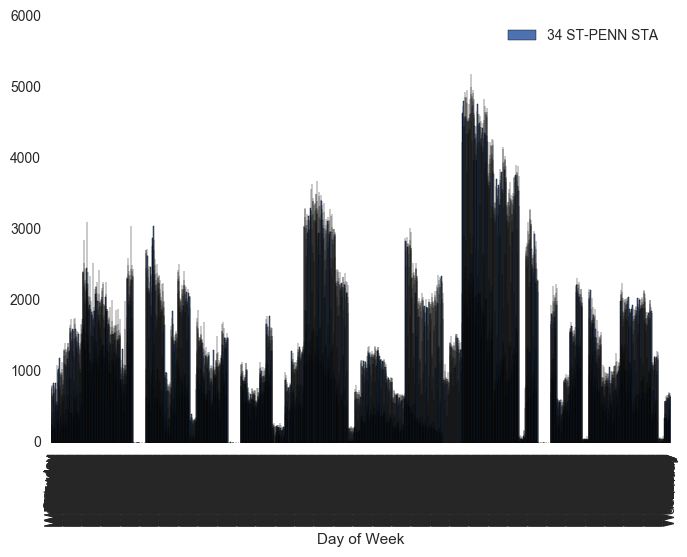

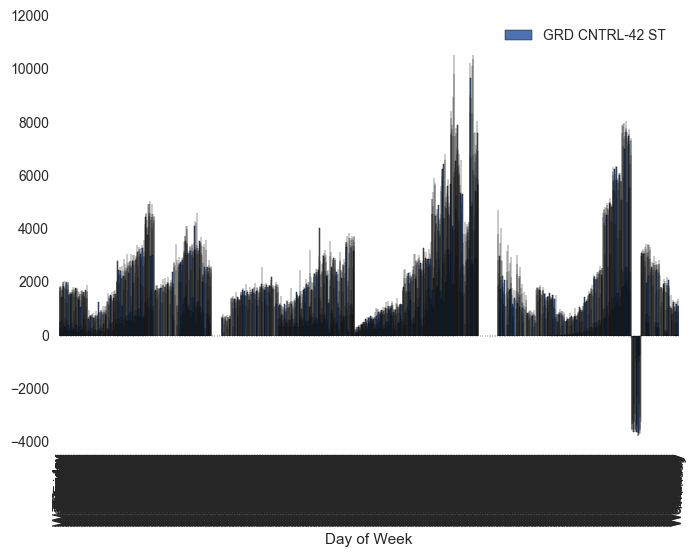

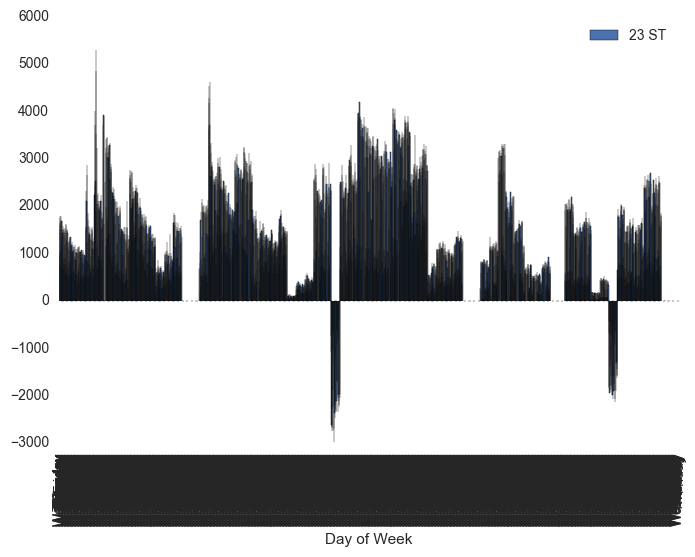

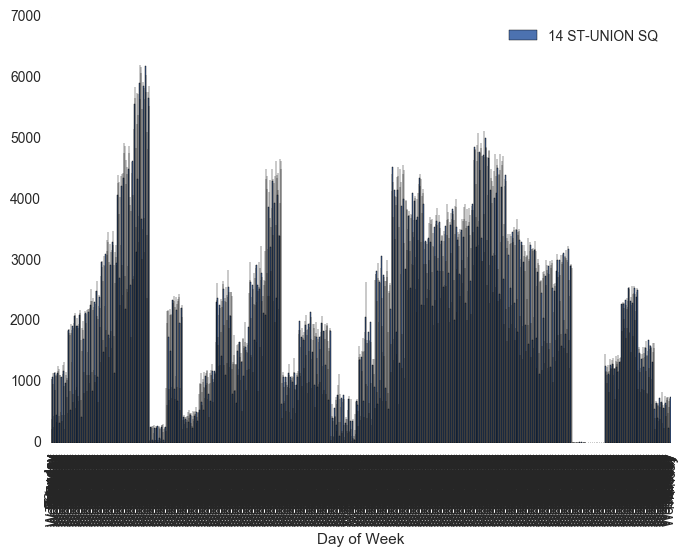

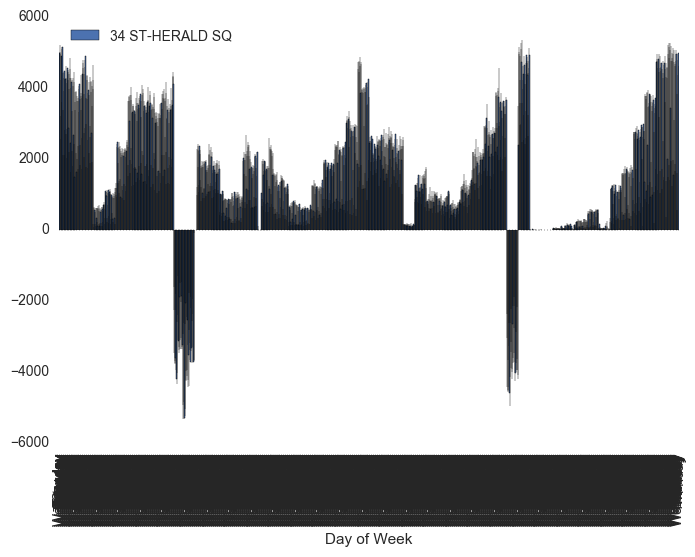

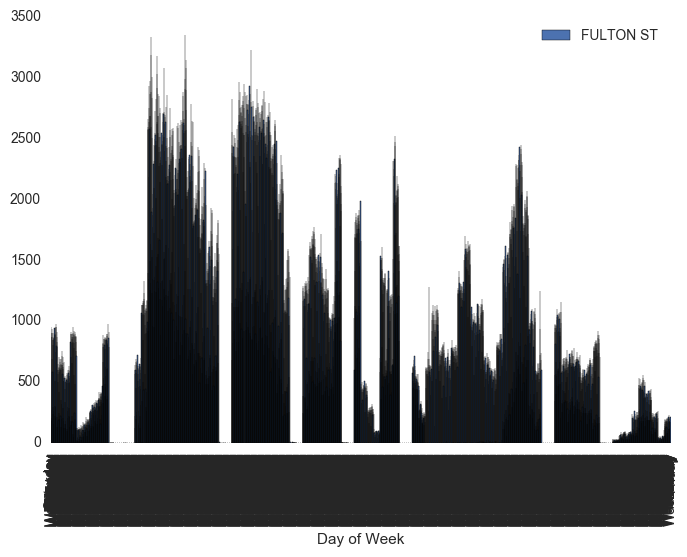

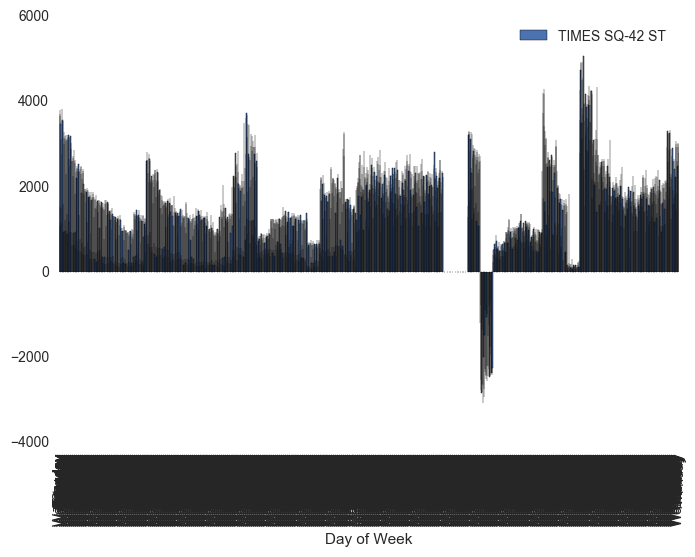

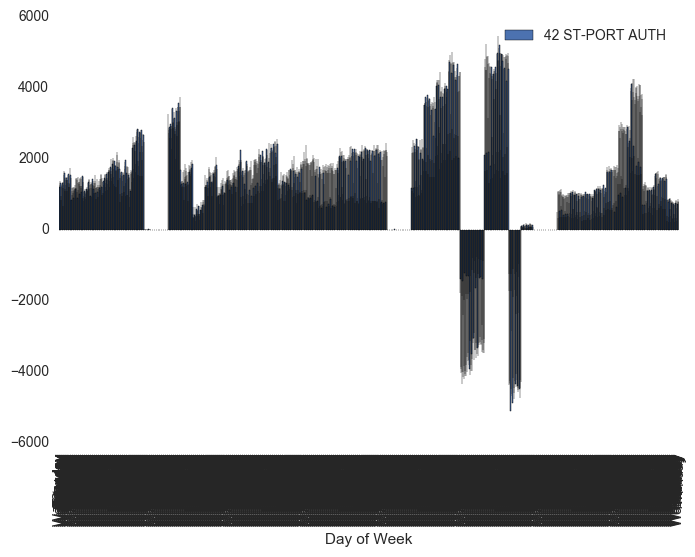

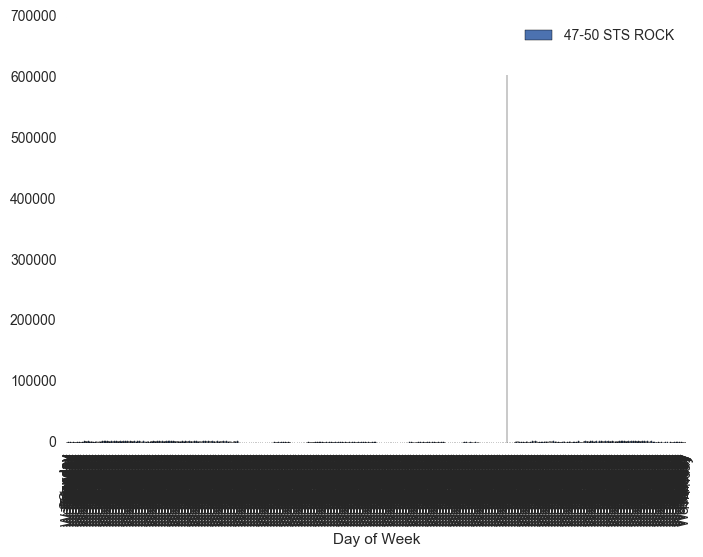

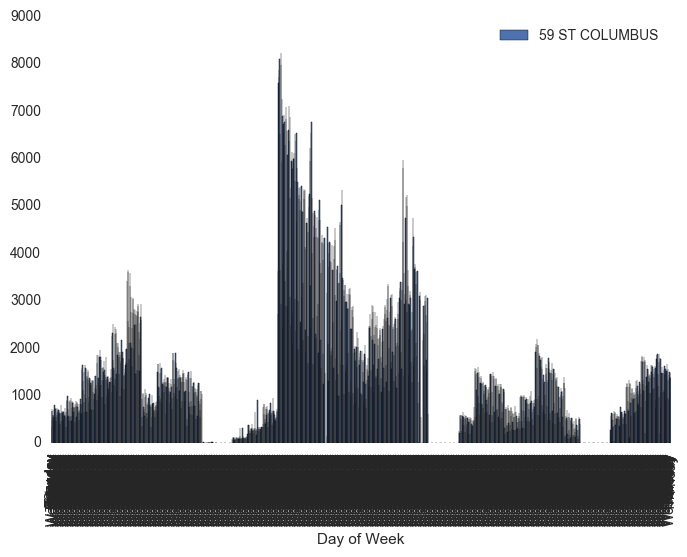

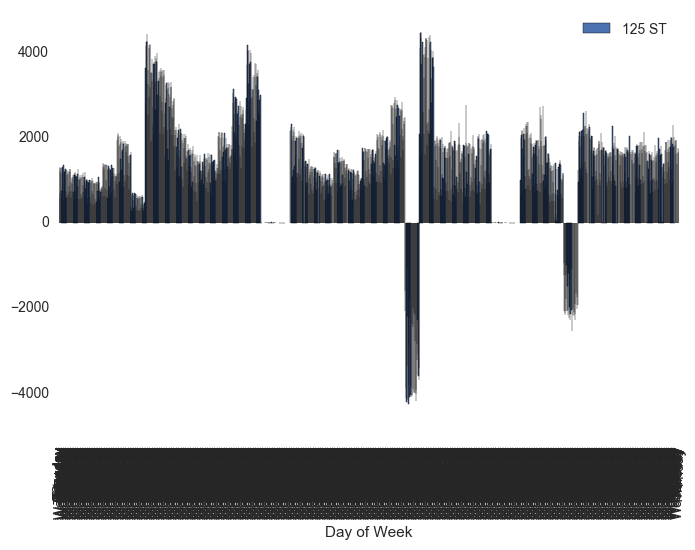

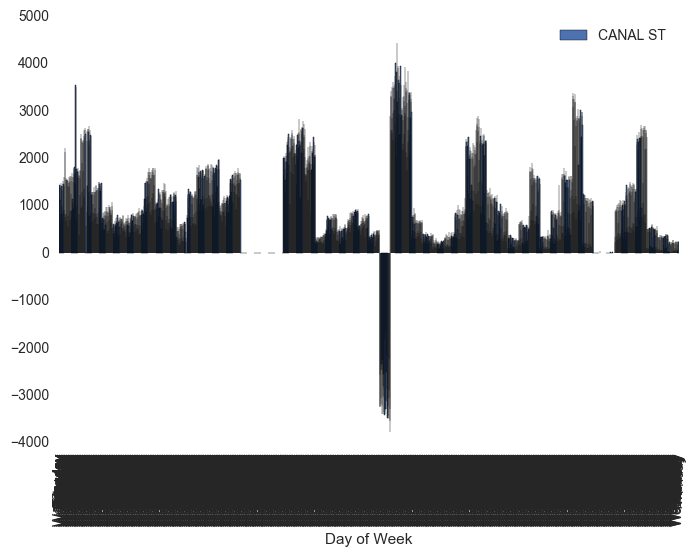

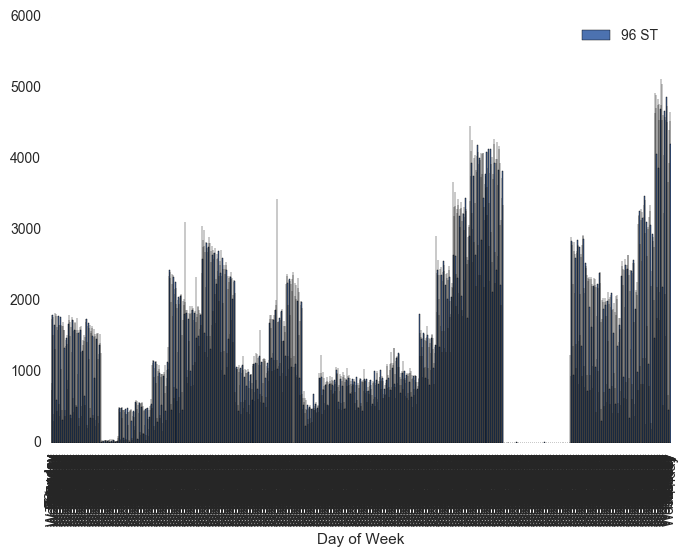

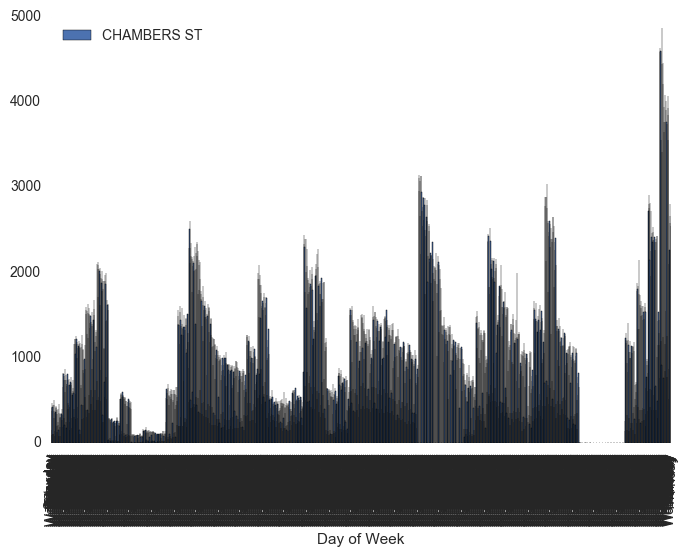

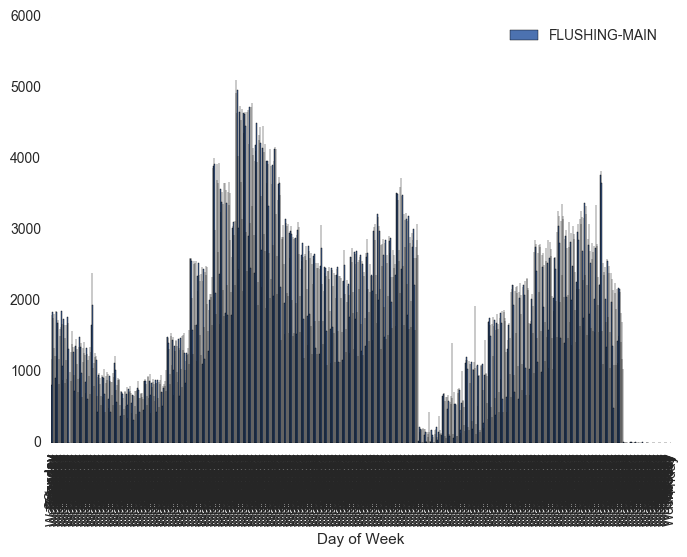

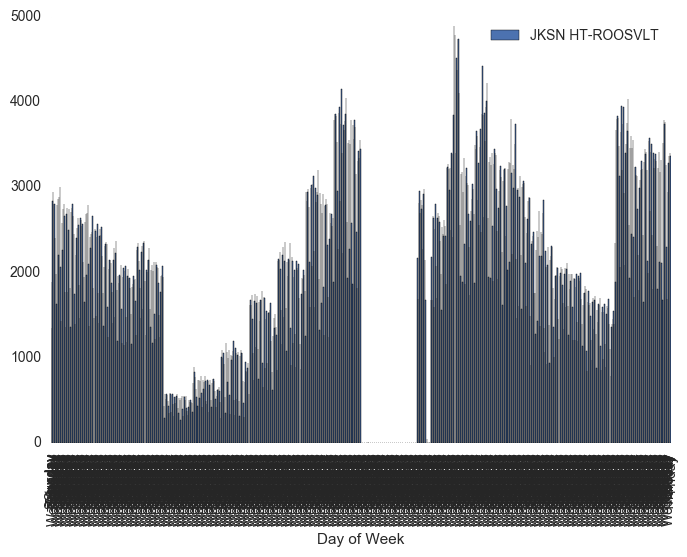

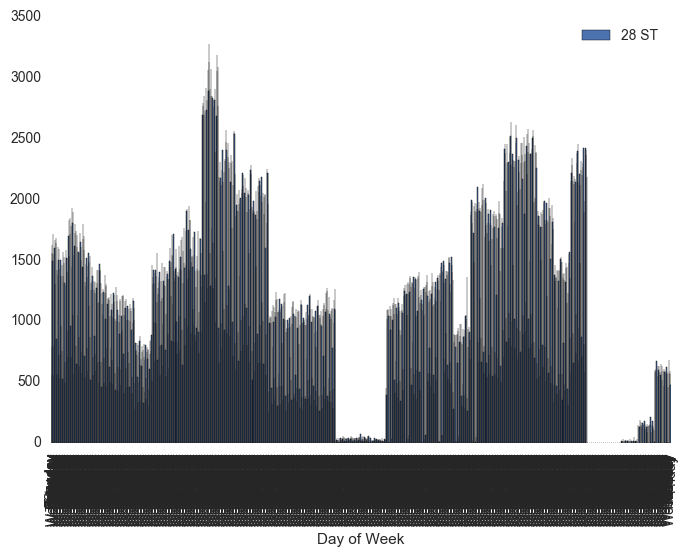

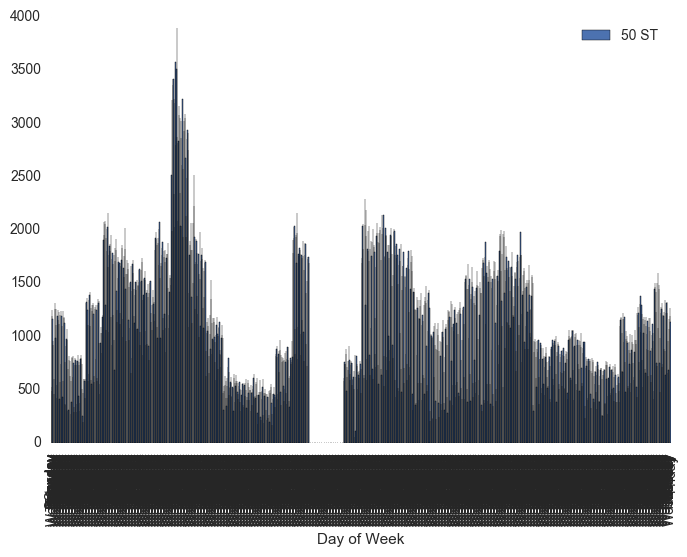

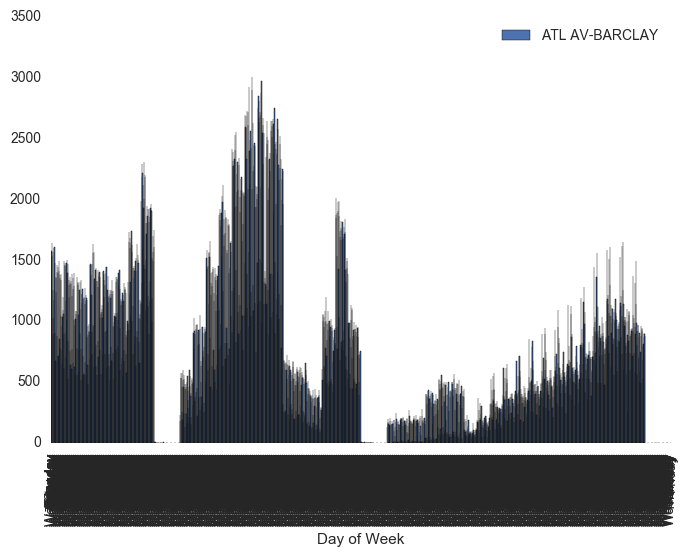

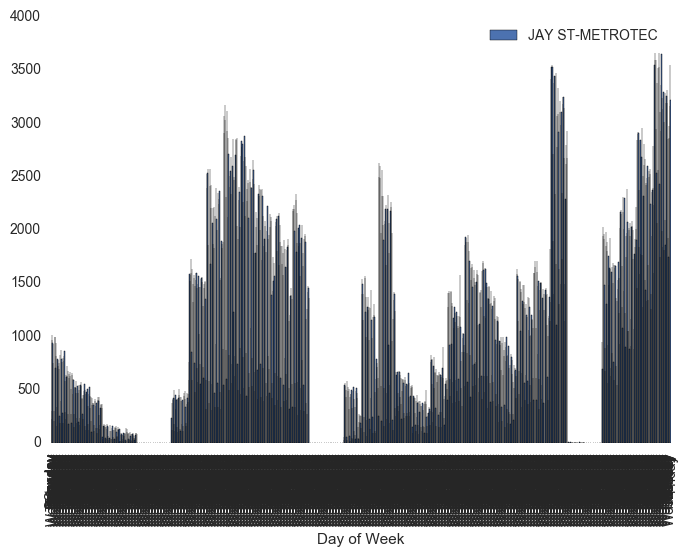

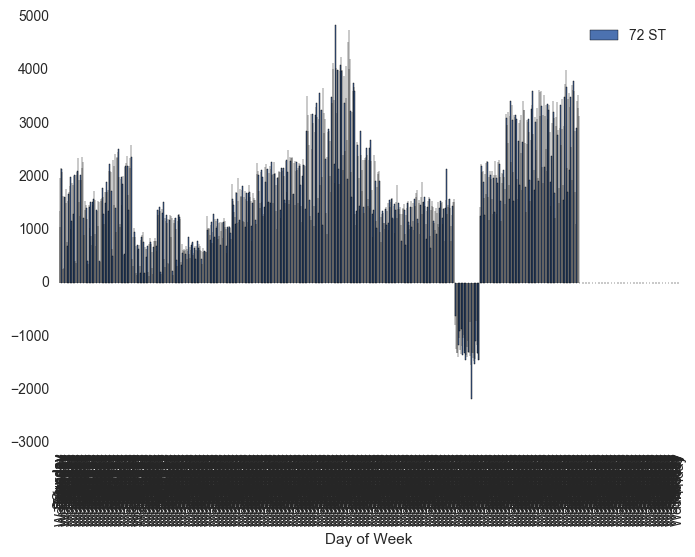

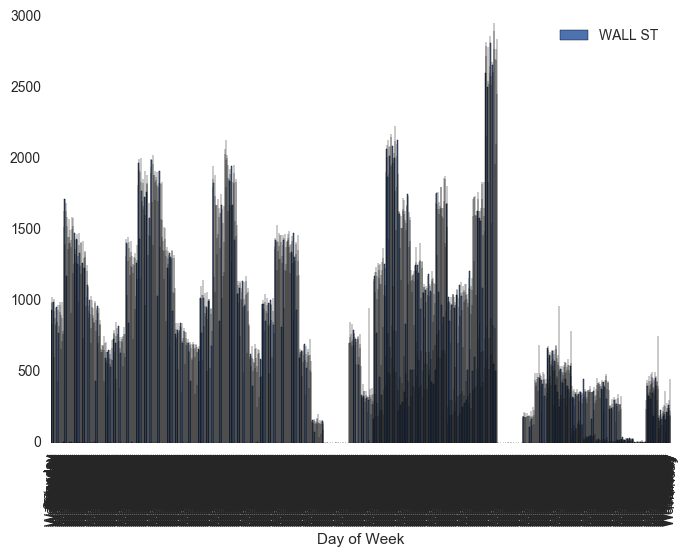

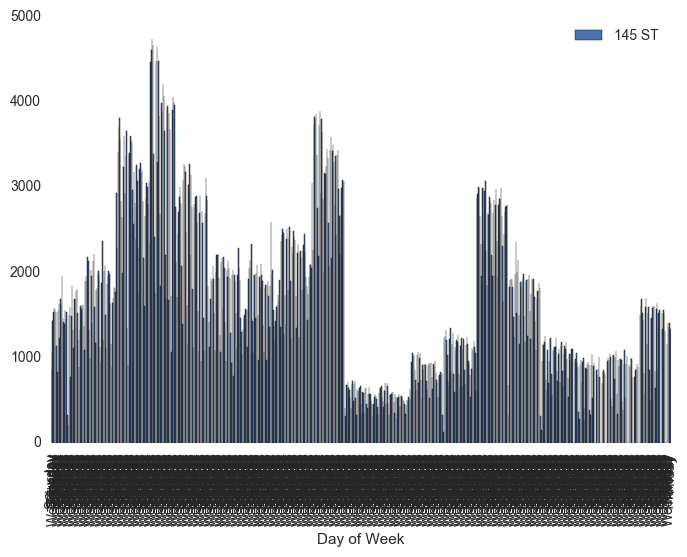

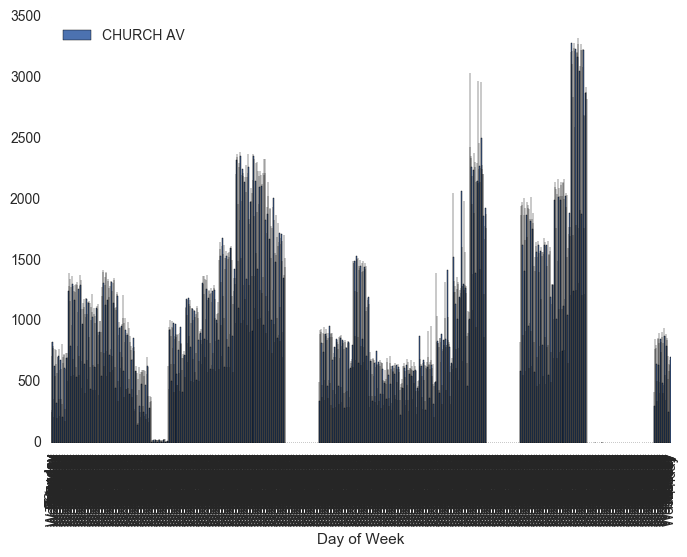

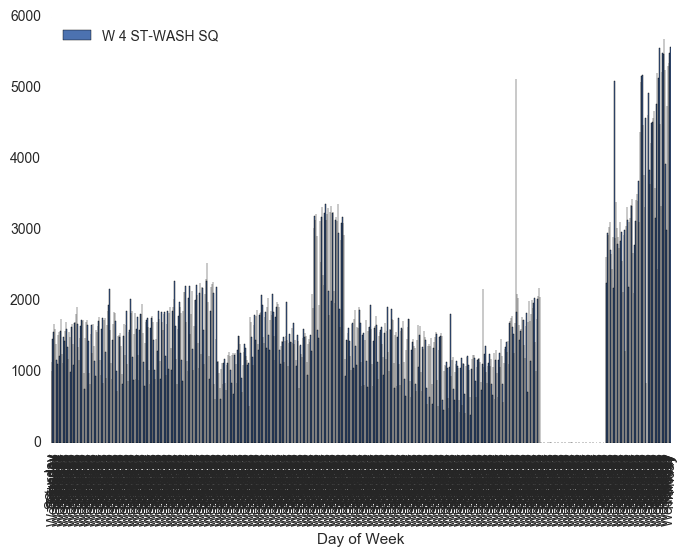

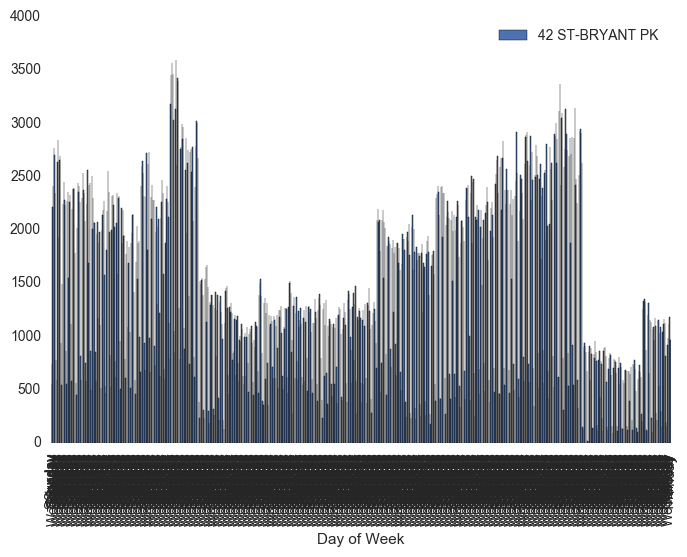

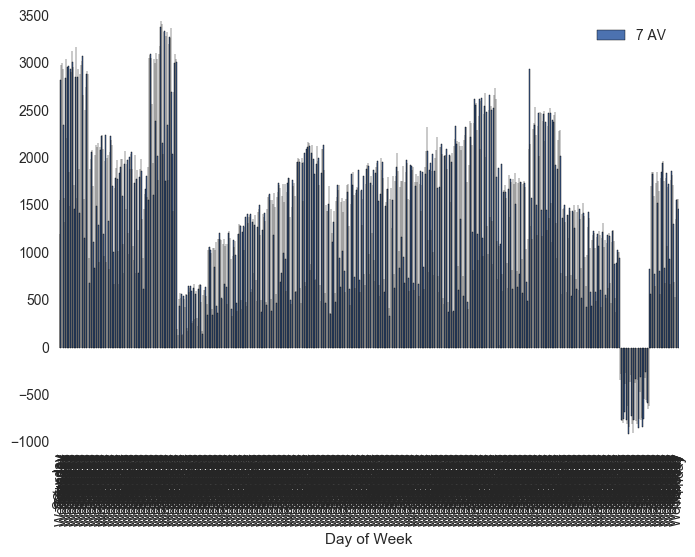

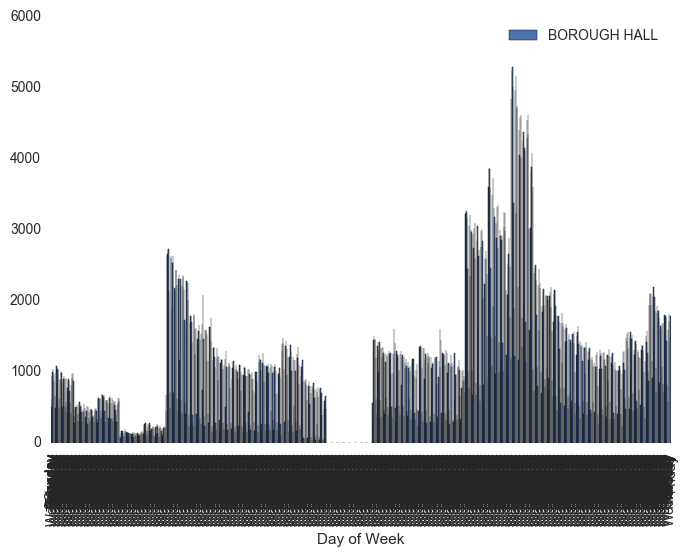

In [39]:
for s in top_20_unique_station:
    df_new=pd.DataFrame()
    df_new=df_anal[df_anal['STATION']==s]
    df_new.plot(kind='bar', x='day_of_week', y='ENTRIES',label=s)
    plt.xlabel('Day of Week')